In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from KMeans import KMeans
from PCA import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("../data_processed.csv")
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1).to_numpy()

In [3]:
pca = PCA(x)

In [4]:
def test_for_n_value(n: int, pca: PCA, k: int = 5):
    z = pca.fit_transform(n)
    kmeans = KMeans(z)
    return kmeans.fit(k, True, plot_metrics = True)

inertia = 1000.7083586386715
Silhouette score = 0.3637518668474664
Gap score = 0.7402220845124665
Davies-Bouldin index = 0.9641747369020155
Calinki-Harabasz index = 462.54994973848113


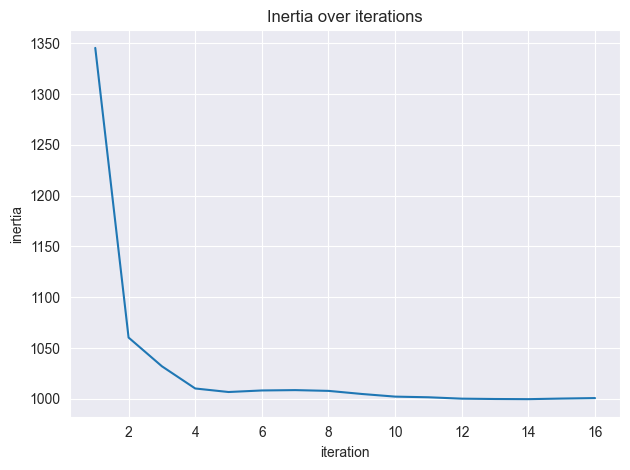

In [5]:
clusters2, centroids2, results2 = test_for_n_value(2, pca)

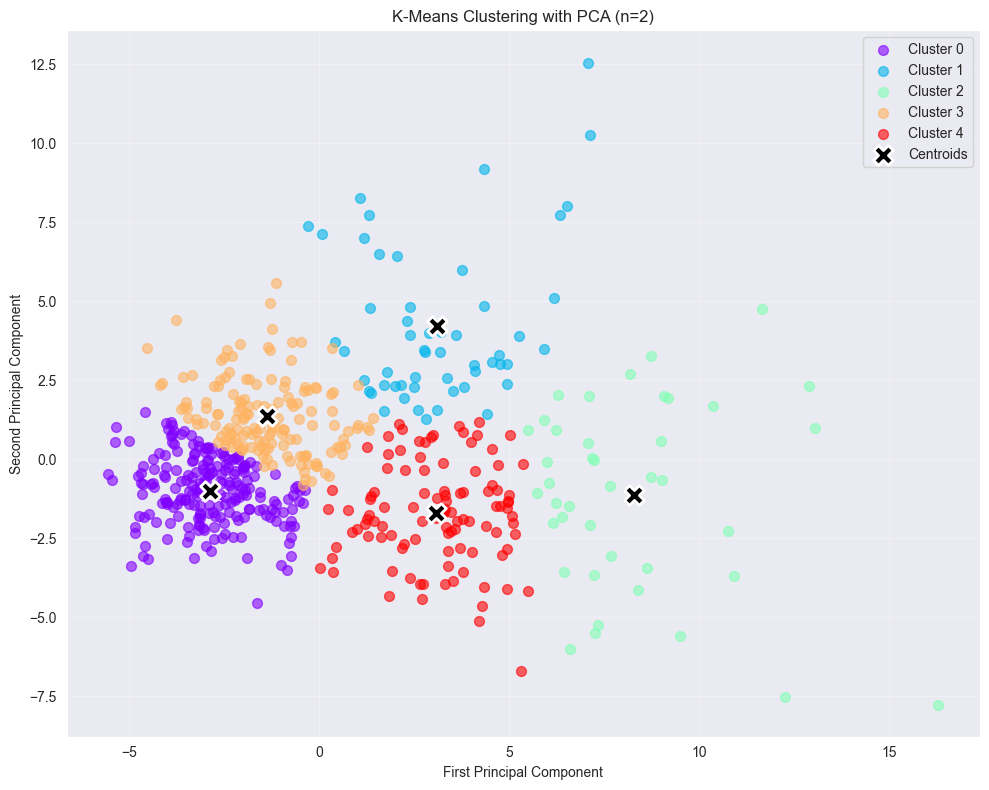

In [6]:
def plot_clusters_2d(clusters: np.ndarray, centroids: np.ndarray, z: np.ndarray, title: str = "K-Means Clustering (n=2)"):
    plt.figure(figsize=(10, 8))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

    for i, cluster in enumerate(unique_clusters):
        cluster_points = z[clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=[colors[i]], label=f'Cluster {cluster}',
                   alpha=0.6, s=50)

    plt.scatter(centroids[:, 0], centroids[:, 1],
               c='black', marker='X', s=200,
               edgecolors='white', linewidths=2,
               label='Centroids')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

z2 = pca.fit_transform(2)
plot_clusters_2d(clusters2, centroids2, z2, "K-Means Clustering with PCA (n=2)")

inertia = 1652.73703988989
Silhouette score = 0.20279562876973237
Gap score = 0.898625276725646
Davies-Bouldin index = 1.4365890147210196
Calinki-Harabasz index = 193.37069657470093


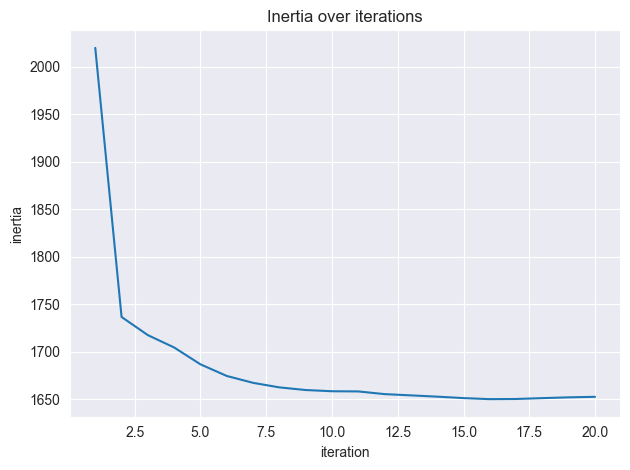

In [7]:
clusters5, centroids5, results5 = test_for_n_value(5, pca)

inertia = 1892.0752332157786
Silhouette score = 0.17056967572995396
Gap score = 0.9804953421963081
Davies-Bouldin index = 1.6017122538960795
Calinki-Harabasz index = 150.99666352605044


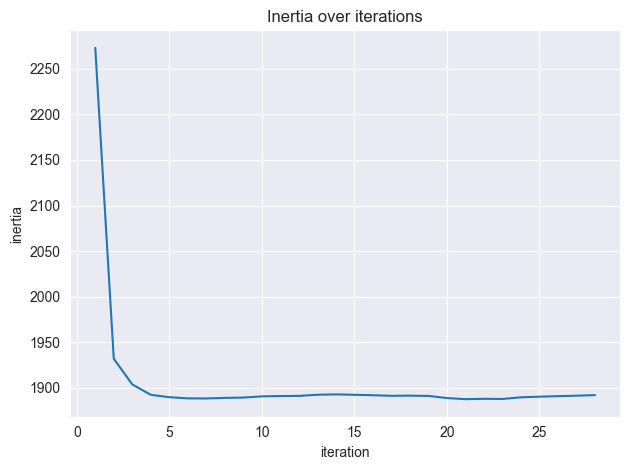

In [8]:
clusters10, centroids10, results10 = test_for_n_value(10, pca)

inertia = 1967.626468919158
Silhouette score = 0.1601471450068569
Gap score = 1.0024558371717012
Davies-Bouldin index = 1.6654943683615286
Calinki-Harabasz index = 140.53178164072386


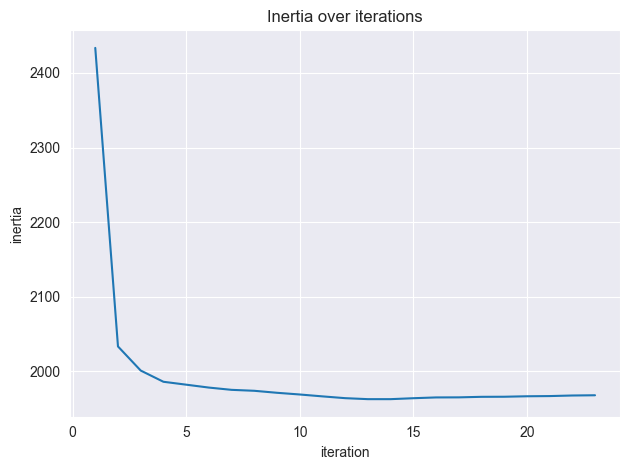

In [9]:
clusters15, centroids15, results15 = test_for_n_value(15, pca)

inertia = 1993.687545682064
Silhouette score = 0.14925956113571962
Gap score = 1.0074653268086173
Davies-Bouldin index = 1.827229745461175
Calinki-Harabasz index = 130.5523369228526


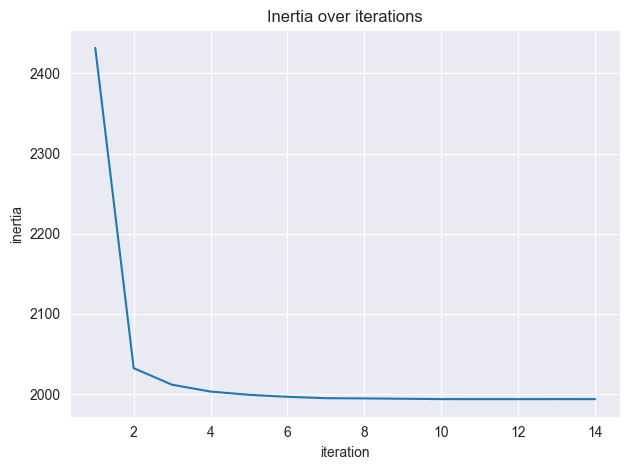

In [10]:
clusters20, centroids20, results20 = test_for_n_value(20, pca)

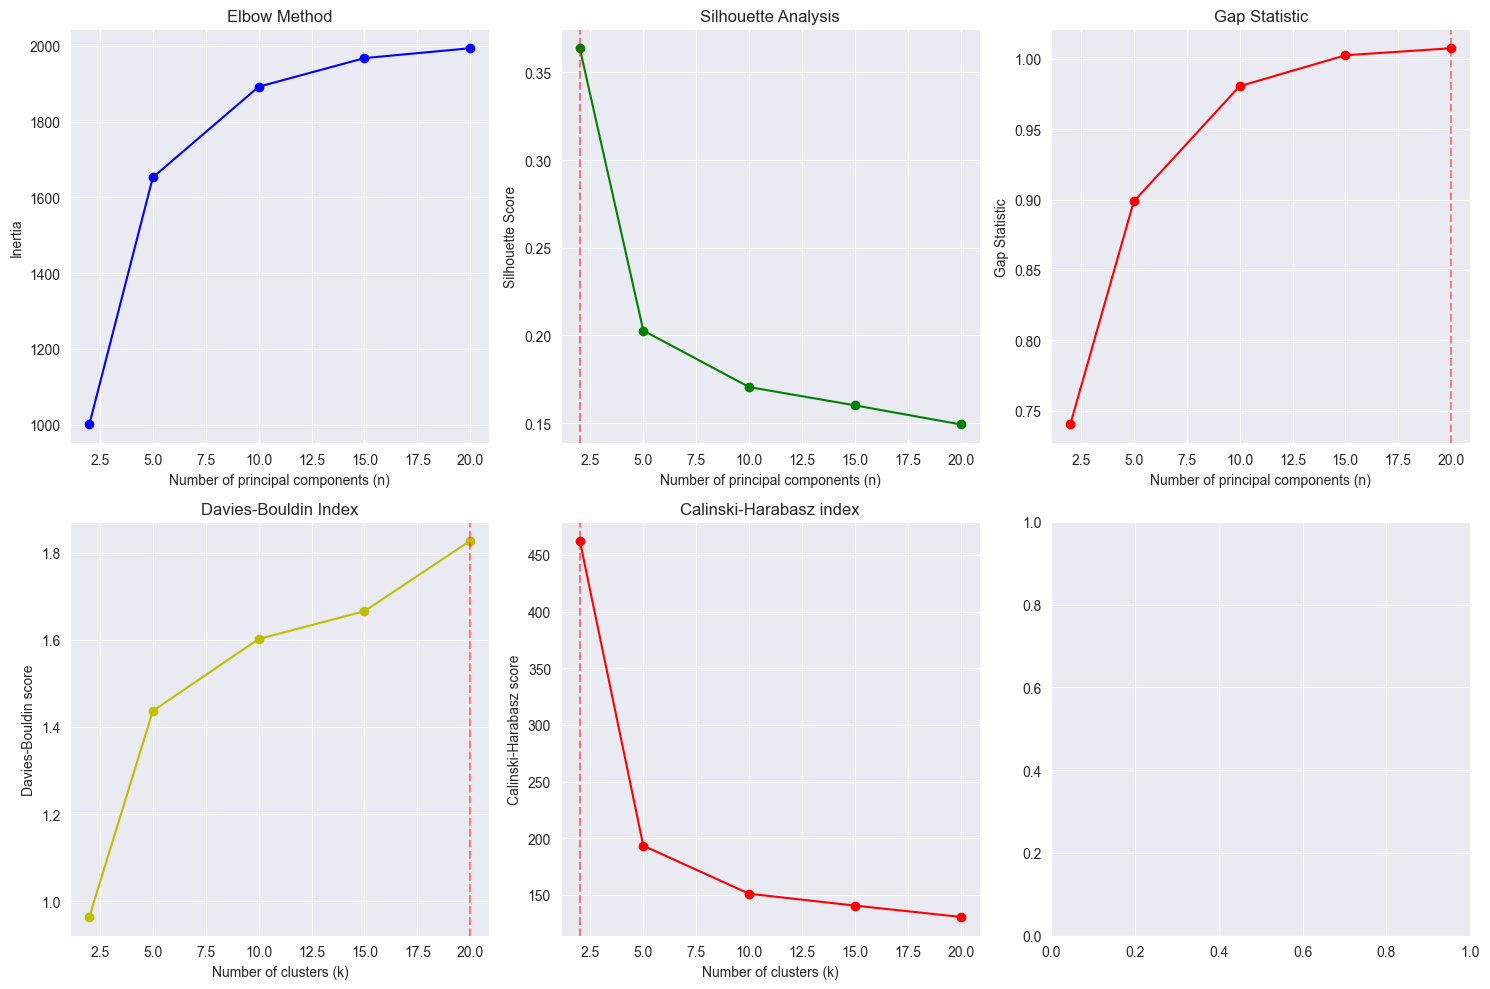

Best n by Silhouette Score: 2 (score: 0.3638)
Best n by Gap Statistic: 20 (gap: 1.0075)
Check the Elbow plot for visual inflection point


In [11]:
n = [2, 5, 10, 15, 20]
inertias = [results2['inertia'], results5['inertia'], results10['inertia'], results15['inertia'], results20['inertia']]
silhouette_scores = [results2['silhouette score'], results5['silhouette score'], results10['silhouette score'], results15['silhouette score'], results20['silhouette score']]
gap_scores = [results2['gap score'], results5['gap score'], results10['gap score'], results15['gap score'], results20['gap score']]
davies_bouldin_scores = [results2['davies-bouldin'], results5['davies-bouldin'], results10['davies-bouldin'], results15['davies-bouldin'], results20['davies-bouldin']]
calinski_harabasz_scores = [results2['calinski_harabasz'], results5['calinski_harabasz'], results10['calinski_harabasz'], results15['calinski_harabasz'], results20['calinski_harabasz']]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0][0].plot(n, inertias, 'bo-')
axes[0][0].set_xlabel('Number of principal components (n)')
axes[0][0].set_ylabel('Inertia')
axes[0][0].set_title('Elbow Method')
axes[0][0].grid(True)

axes[0][1].plot(n, silhouette_scores, 'go-')
axes[0][1].set_xlabel('Number of principal components (n)')
axes[0][1].set_ylabel('Silhouette Score')
axes[0][1].set_title('Silhouette Analysis')
best_sil_k = list(n)[np.argmax(silhouette_scores)]
axes[0][1].axvline(x=best_sil_k, color='r', linestyle='--', alpha=0.5)
axes[0][1].grid(True)

axes[0][2].plot(n, gap_scores, 'ro-')
axes[0][2].set_xlabel('Number of principal components (n)')
axes[0][2].set_ylabel('Gap Statistic')
axes[0][2].set_title('Gap Statistic')
best_gap_k = list(n)[np.argmax(gap_scores)]
axes[0][2].axvline(x=best_gap_k, color='r', linestyle='--', alpha=0.5)
axes[0][2].grid(True)

axes[1][0].plot(n,  davies_bouldin_scores, 'yo-')
axes[1][0].set_xlabel('Number of clusters (k)')
axes[1][0].set_ylabel('Davies-Bouldin score')
axes[1][0].set_title('Davies-Bouldin Index')
best_db_k = list(n)[np.argmax(davies_bouldin_scores)]
axes[1][0].axvline(x=best_db_k, color='r', linestyle='--', alpha=0.5)
axes[1][0].grid(True)

axes[1][1].plot(n, calinski_harabasz_scores, 'ro-')
axes[1][1].set_xlabel('Number of clusters (k)')
axes[1][1].set_ylabel('Calinski-Harabasz score')
axes[1][1].set_title('Calinski-Harabasz index')
best_ch_k = list(n)[np.argmax(calinski_harabasz_scores)]
axes[1][1].axvline(x=best_ch_k, color='r', linestyle='--', alpha=0.5)
axes[1][1].grid(True)
plt.tight_layout()
plt.show()

best_n_silhouette = list(n)[np.argmax(silhouette_scores)]
best_n_gap = list(n)[np.argmax(gap_scores)]

print(f"Best n by Silhouette Score: {best_n_silhouette} (score: {max(silhouette_scores):.4f})")
print(f"Best n by Gap Statistic: {best_n_gap} (gap: {max(gap_scores):.4f})")
print("Check the Elbow plot for visual inflection point")


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


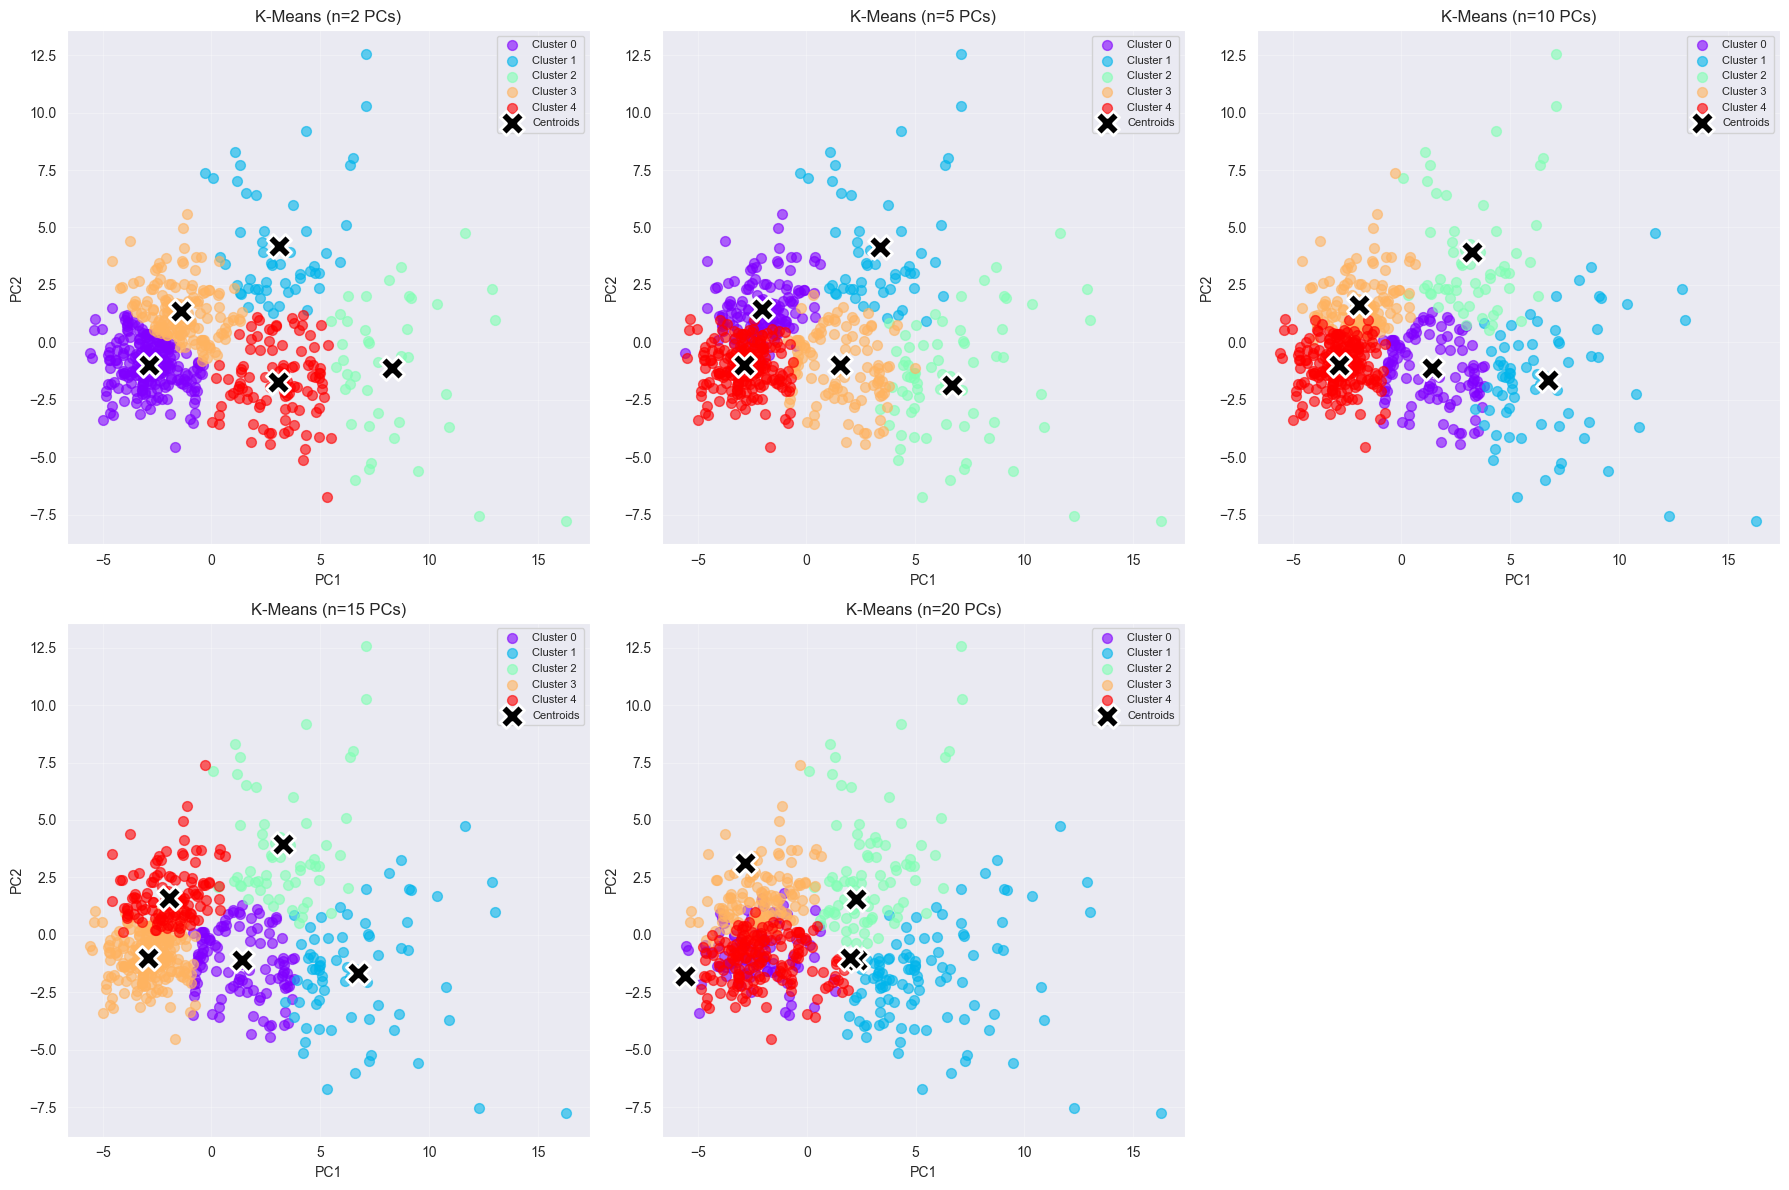

In [12]:
# Add this cell to your notebook
def plot_multiple_pca_clusterings(pca: PCA, n_values: list, clusters_list: list, centroids_list: list):
    """
    Plot K-Means clustering results for different n values, all visualized in 2D.

    Args:
        pca: PCA object fitted on data
        n_values: list of n values (number of principal components used)
        clusters_list: list of cluster assignments for each n
        centroids_list: list of centroids for each n
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    # Always use first 2 PCs for visualization
    z_2d = pca.fit_transform(2)

    for idx, (n, clusters, centroids) in enumerate(zip(n_values, clusters_list, centroids_list)):
        ax = axes[idx]

        unique_clusters = np.unique(clusters)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

        # Plot each cluster
        for i, cluster in enumerate(unique_clusters):
            cluster_points = z_2d[clusters == cluster]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                      c=[colors[i]], label=f'Cluster {cluster}',
                      alpha=0.6, s=50)

        # Transform centroids to 2D for visualization
        if centroids.shape[1] == 2:
            centroids_2d = centroids
        else:
            # Project centroids back to original space, then to 2D
            centroids_original = pca.inverse_transform(centroids)
            pca_temp = PCA(centroids_original)
            centroids_2d = pca_temp.fit_transform(2)

        ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
                  c='black', marker='X', s=300,
                  edgecolors='white', linewidths=2,
                  label='Centroids', zorder=5)

        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_title(f'K-Means (n={n} PCs)')
        ax.legend(loc='best', fontsize=8)
        ax.grid(True, alpha=0.3)

    # Hide the last subplot if we have fewer than 6 plots
    if len(n_values) < 6:
        axes[-1].axis('off')

    plt.tight_layout()
    plt.show()

# Use it like this:
n_values = [2, 5, 10, 15, 20]
clusters_list = [clusters2, clusters5, clusters10, clusters15, clusters20]
centroids_list = [centroids2, centroids5, centroids10, centroids15, centroids20]

plot_multiple_pca_clusterings(pca, n_values, clusters_list, centroids_list)

k=2: Inertia=1427.4409, Silhouette=0.5104
k=3: Inertia=1240.8425, Silhouette=0.4941
k=4: Inertia=1091.5670, Silhouette=0.3530
k=5: Inertia=1000.7084, Silhouette=0.3638
k=6: Inertia=929.5416, Silhouette=0.3606
k=7: Inertia=901.2299, Silhouette=0.3404
k=8: Inertia=839.7119, Silhouette=0.3353
k=9: Inertia=806.8952, Silhouette=0.3100
k=10: Inertia=769.2335, Silhouette=0.3340


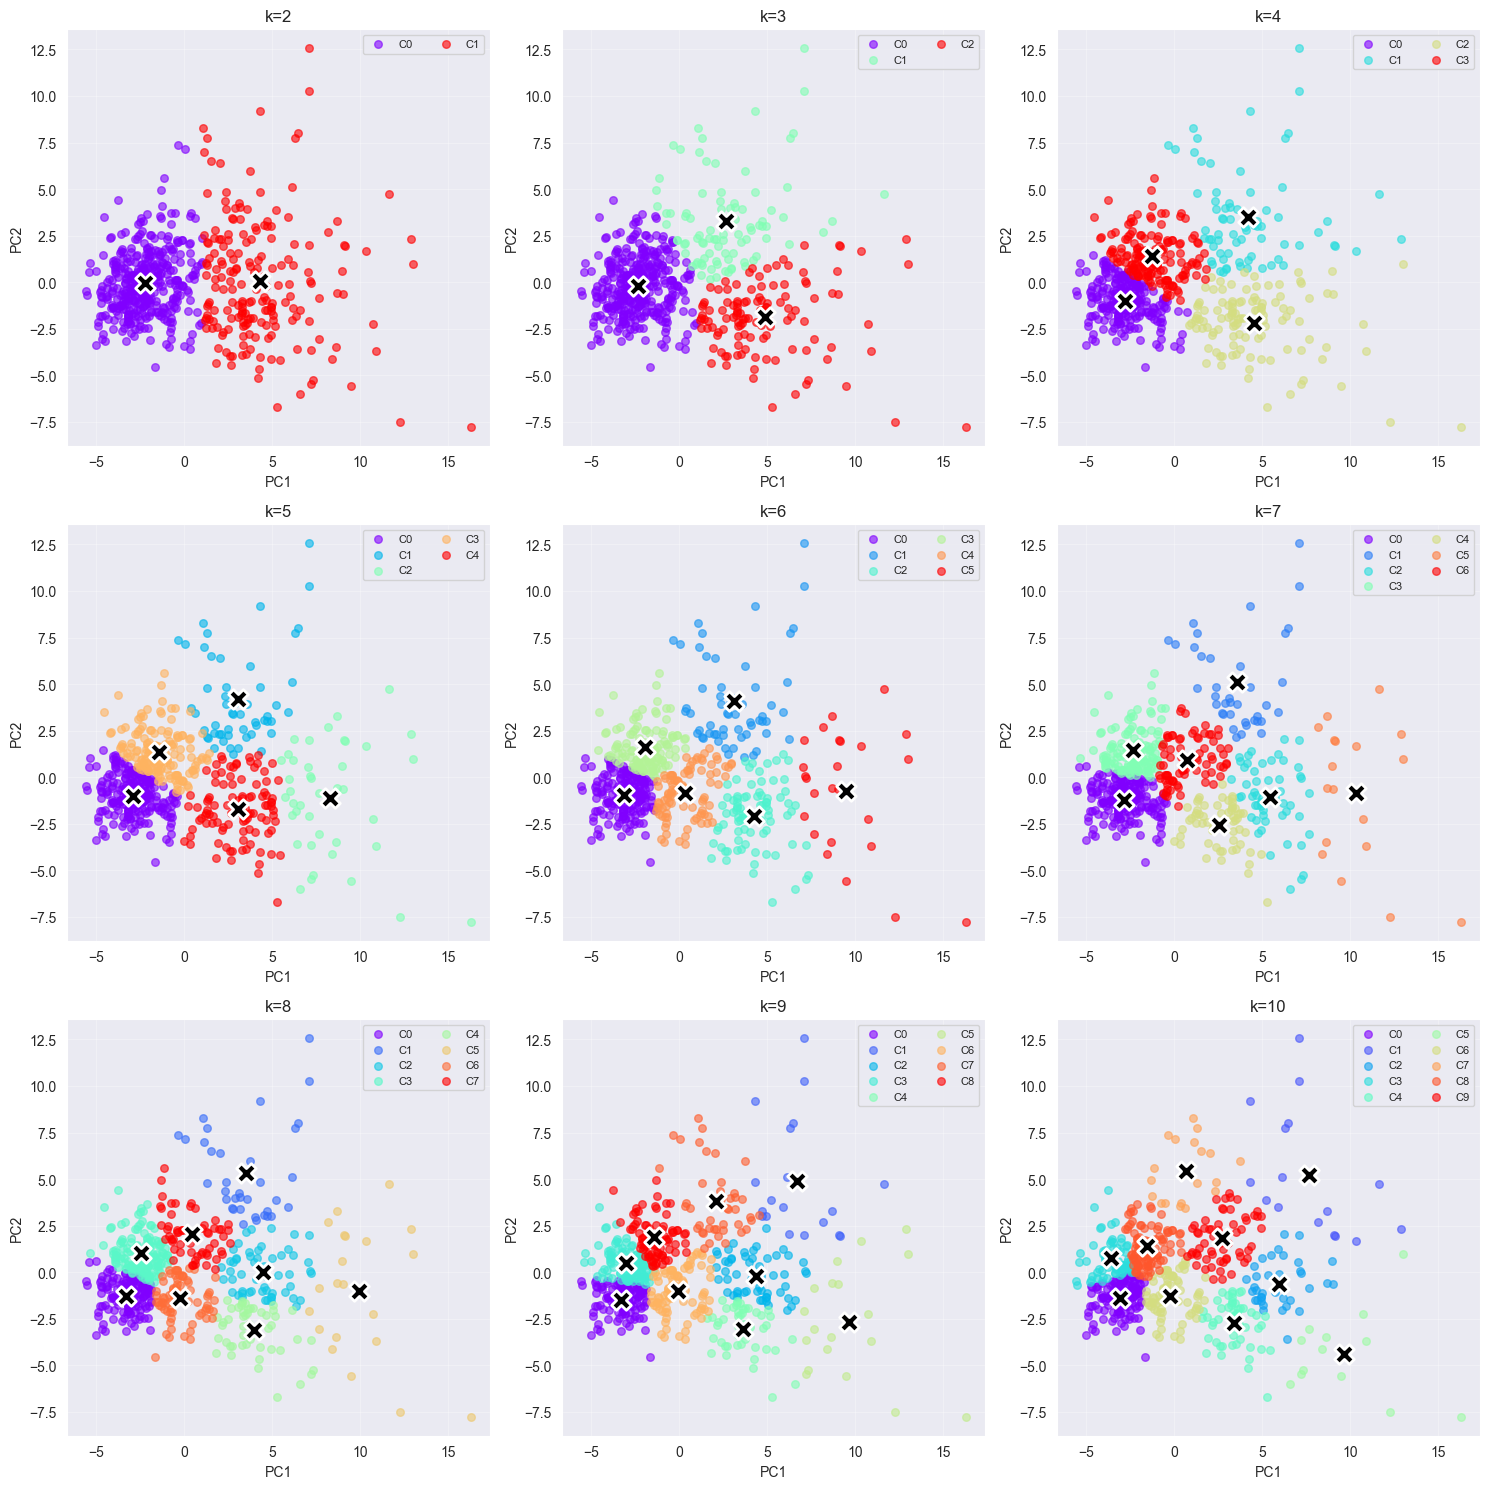

In [13]:
# Transform data to 2D using PCA
z_2d = pca.fit_transform(2)

# Apply K-Means for different k values
k_values = range(2, 11)  # k from 2 to 10
results_dict = {}

for k in k_values:
    kmeans = KMeans(z_2d)
    clusters, centroids, results = kmeans.fit(k, smart_initialization=True, plot_metrics=False)
    results_dict[k] = {
        'clusters': clusters,
        'centroids': centroids,
        'results': results
    }
    print(f"k={k}: Inertia={results['inertia']:.4f}, Silhouette={results['silhouette score']:.4f}")

# Visualize all clusterings
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    clusters = results_dict[k]['clusters']
    centroids = results_dict[k]['centroids']

    unique_clusters = np.unique(clusters)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

    for i, cluster in enumerate(unique_clusters):
        cluster_points = z_2d[clusters == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                  c=[colors[i]], label=f'C{cluster}', alpha=0.6, s=30)

    ax.scatter(centroids[:, 0], centroids[:, 1],
              c='black', marker='X', s=200,
              edgecolors='white', linewidths=2, zorder=5)

    ax.set_title(f'k={k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

In [14]:
from external_metrics import *

In [15]:
z = pca.fit_transform(20)
kmeans = KMeans(z)
clusters, centroids, results = kmeans.fit(7)

In [16]:
print(f"Adjusted rand index = {adjusted_rand_index(y, clusters)}")
print(f"Normalized mutual info = {normalized_mutual_info(y, clusters)}")
print(f"Purity = {purity_score(y, clusters)}")

Adjusted rand index = 0.247185257581432
Normalized mutual info = 0.3408574362684019
Purity = 0.9015817223198594


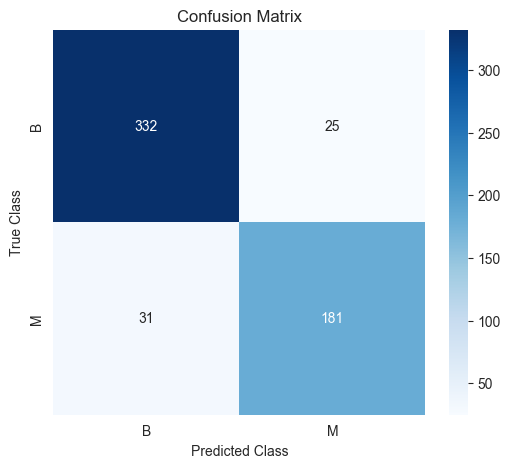

In [18]:
mapped_clusters = map_clusters_to_labels(clusters, assign_clusters_to_classes(y, clusters))
cm = confusion_matrix(y, mapped_clusters)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(mapped_clusters),
            yticklabels=np.unique(y))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix")
plt.show()

In [19]:
print(compute_binary_metrics(y, mapped_clusters))

{'accuracy': np.float64(0.9015817223198594), 'precision': np.float64(0.8786407766990292), 'recall': np.float64(0.8537735849056604), 'f1': np.float64(0.8660287081339713), 'tp': np.int64(181), 'fp': np.int64(25), 'fn': np.int64(31), 'tn': np.int64(332)}
